In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [50]:
track_left = pd.read_csv("data/f1sim-ref-left.csv")
track_right = pd.read_csv("data/f1sim-ref-right.csv")
track_line = pd.read_csv("data/f1sim-ref-line.csv")
turns = pd.read_csv("data/f1sim-ref-turns.csv")

# Plotting the track

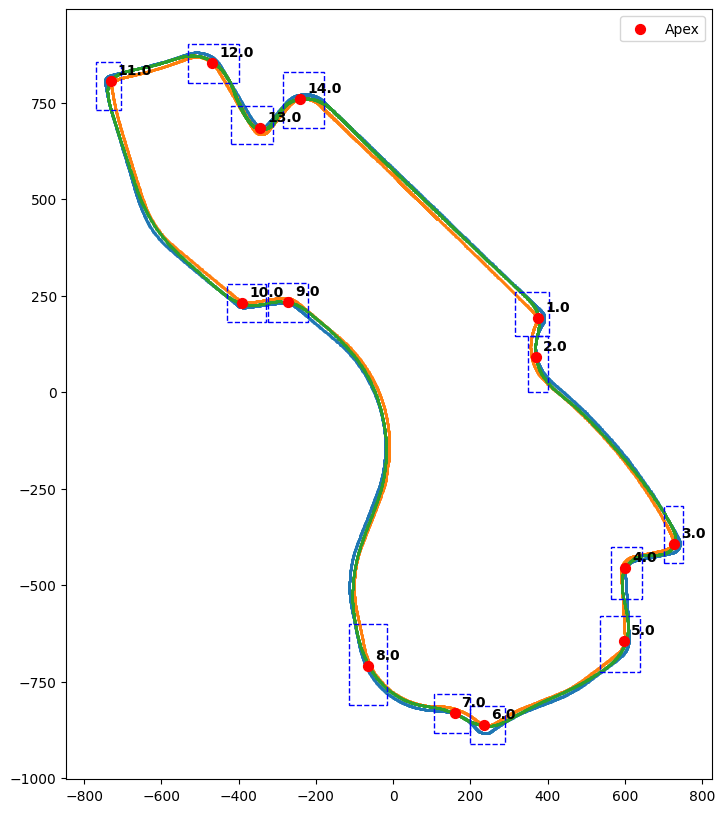

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(track_left["WORLDPOSX"], track_left["WORLDPOSY"], s=1)
ax.scatter(track_right["WORLDPOSX"], track_right["WORLDPOSY"], s=1)
ax.scatter(track_line["WORLDPOSX"], track_line["WORLDPOSY"], s=1)


# Plot apex dots
ax.scatter(turns["APEX_X1"], turns["APEX_Y1"], color="red", s=50, label="Apex")

# Draw boxes using corner coordinates
for _, row in turns.iterrows():
    x_min = min(row["CORNER_X1"], row["CORNER_X2"])
    x_max = max(row["CORNER_X1"], row["CORNER_X2"])
    y_min = min(row["CORNER_Y1"], row["CORNER_Y2"])
    y_max = max(row["CORNER_Y1"], row["CORNER_Y2"])

    # Rectangle patch
    rect = plt.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        fill=False,
        color="blue",
        linestyle="--"
    )
    ax.add_patch(rect)
    
    ax.annotate(str(row["TURN"]),
                (row["APEX_X1"], row["APEX_Y1"]),
                textcoords="offset points", xytext=(5, 5),
                color="black", fontsize=10, weight="bold")

# Formatting
ax.set_aspect("equal", "box")
ax.legend()
plt.show()



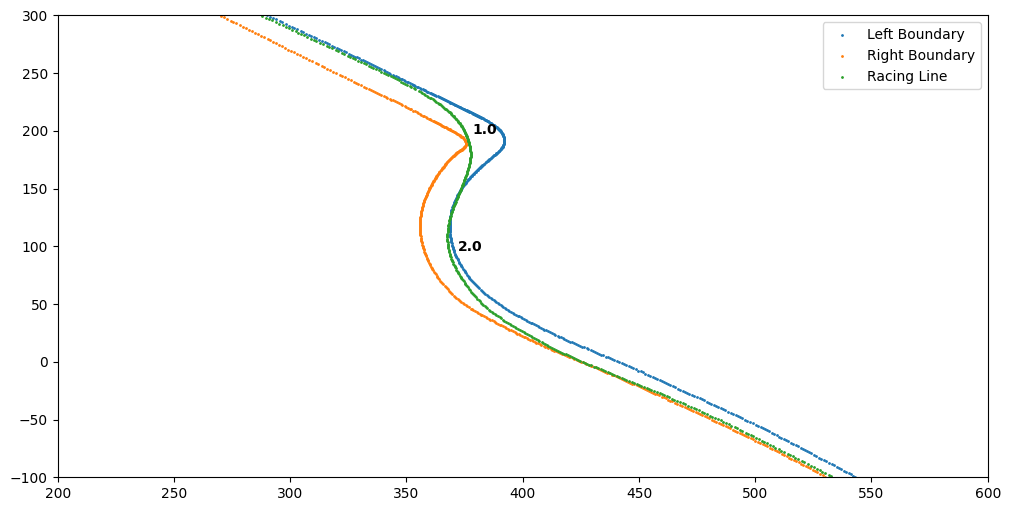

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(track_left["WORLDPOSX"], track_left["WORLDPOSY"], s=1, label="Left Boundary")
plt.scatter(track_right["WORLDPOSX"], track_right["WORLDPOSY"], s=1, label="Right Boundary")
plt.scatter(track_line["WORLDPOSX"], track_line["WORLDPOSY"], s=1, label="Racing Line")

plt.legend()

# Add turn annotations
for _, row in turns.iterrows():
    plt.annotate(str(row["TURN"]),
                (row["APEX_X1"], row["APEX_Y1"]),
                textcoords="offset points", xytext=(5, 5),
                color="black", fontsize=10, weight="bold")

# Set zoomed-in limits
plt.xlim(200, 600)  
plt.ylim(-100, 300)
plt.show()


In [53]:
data = pd.read_csv('data/UNSW F12024.csv')

C:\Users\samue\AppData\Local\Temp\ipykernel_17652\314155161.py:1: DtypeWarning: Columns (70,71,73,74,82) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/UNSW F12024.csv')


## Sectioning The data by Track
We only care about the Melbourne track

In [54]:
track0_data = data[data['M_TRACKID'] == 0]

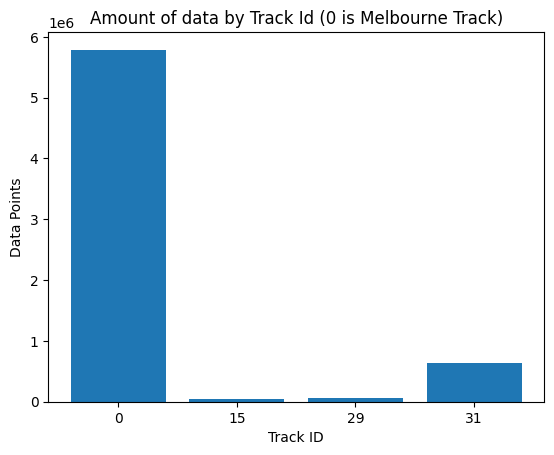

In [55]:
tracks = data.groupby("M_TRACKID").size()
plt.bar(x = tracks.index.astype(str), height = list(tracks.values))
plt.xlabel("Track ID")
plt.ylabel("Data Points")
plt.title("Amount of data by Track Id (0 is Melbourne Track)")
plt.show()

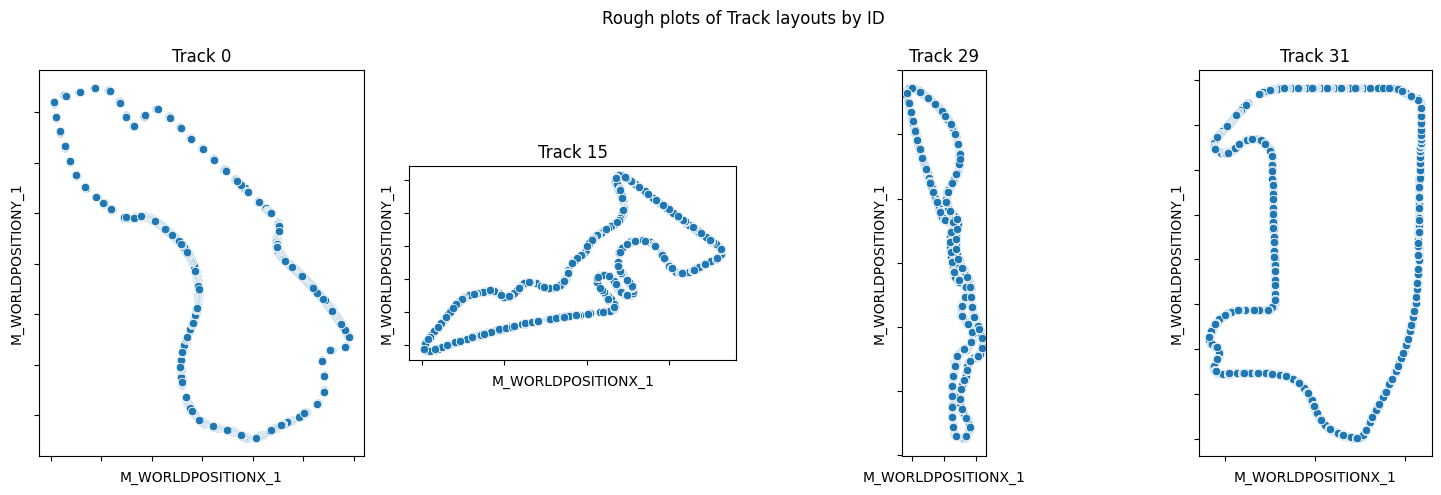

In [56]:
x_col="M_WORLDPOSITIONX_1" 
y_col="M_WORLDPOSITIONY_1"
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

track_ids = [0, 15, 29, 31]
for ax, tid in zip(axes, track_ids):
    if tid != 0:
        subset = data[data['M_TRACKID'] == tid].iloc[:5000]
    else: 
        subset = track0_data.iloc[:3000]
    sns.scatterplot(data=subset, x=x_col, y=y_col, ax=ax)
    ax.set_title(f"Track {tid}")
    ax.set_xticklabels([])  # hide x tick labels
    ax.set_yticklabels([])
    ax.set_aspect('equal', adjustable='box')

plt.suptitle("Rough plots of Track layouts by ID")
plt.tight_layout()
plt.show()

## Sectioning the Data by Distance
Keeping only the data from laps where distance is less than 1200 as we are not focused on the other corners

In [57]:
run_data = track0_data[track0_data['M_LAPDISTANCE_1'] <= 1200]

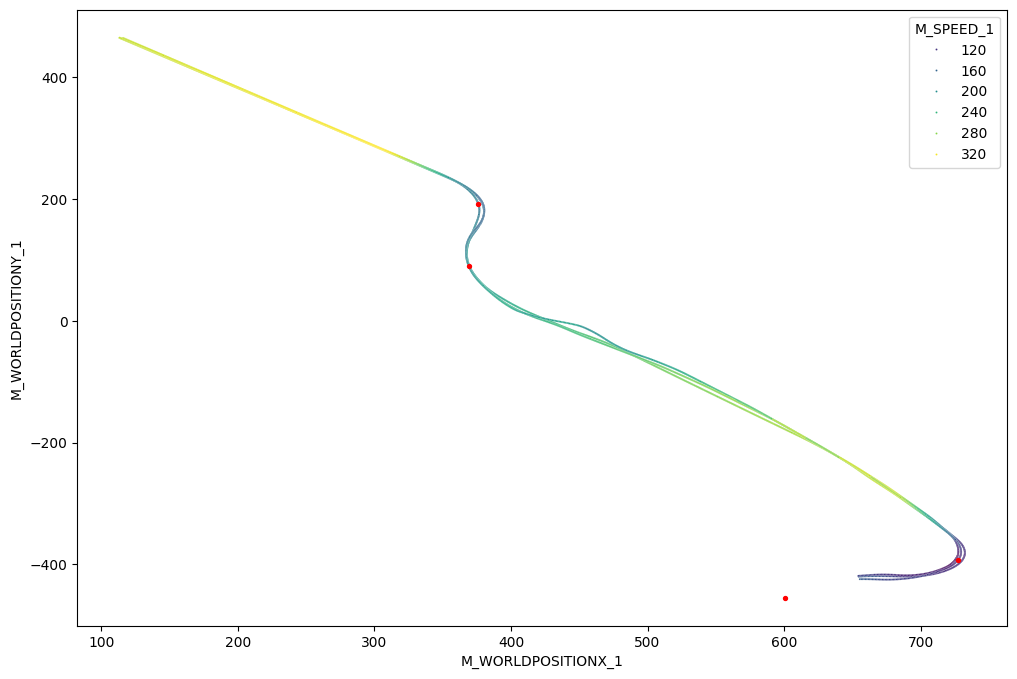

In [58]:
color_col="M_SPEED_1"

plt.figure(figsize=(12, 8))
sns.scatterplot(data=run_data[run_data["M_SESSIONUID"] == run_data.M_SESSIONUID.unique()[4]], x=x_col, y=y_col, hue=color_col, palette="viridis", s=2)
plt.scatter(turns["APEX_X1"][:4], turns["APEX_Y1"][:4], color="red", s=8, label="Apex")
plt.show()


# Track by rough distances

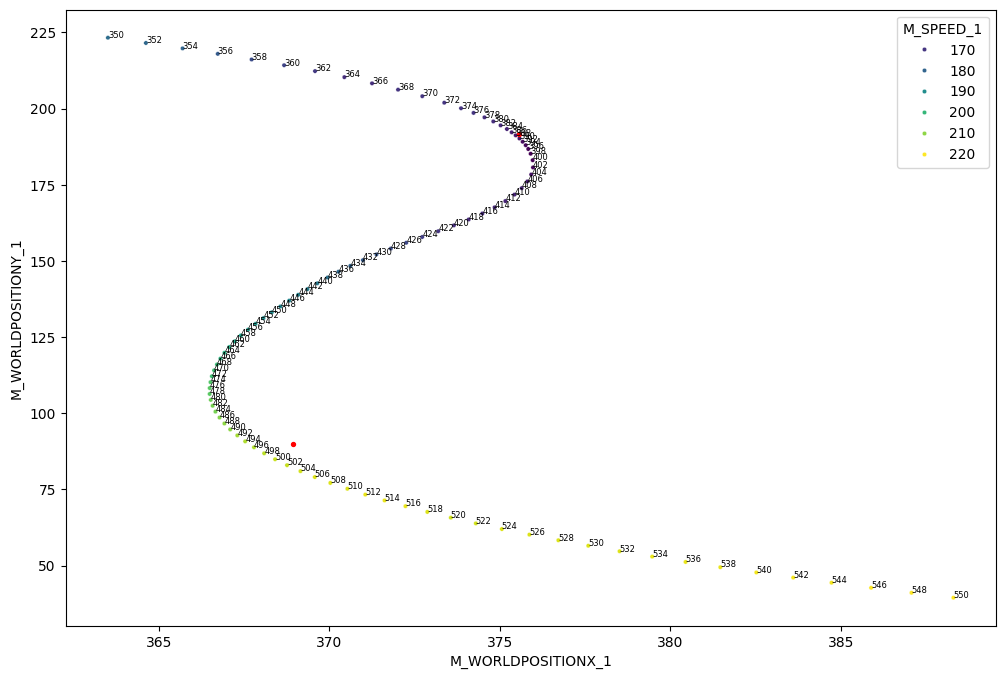

In [59]:
plt.figure(figsize=(12, 8))
sample = 2

plt_data = run_data[(run_data["M_SESSIONUID"] == run_data.M_SESSIONUID.unique()[2]) & (run_data["M_CURRENTLAPNUM"] == 1) & (
    run_data['M_LAPDISTANCE_1'] <= 550) & (run_data['M_LAPDISTANCE_1'] >= 350)].sort_values(by=["M_LAPDISTANCE_1"])

sns.scatterplot(data=plt_data.iloc[::sample], x=x_col,
                y=y_col, hue=color_col, palette="viridis", s=10)

for row in plt_data.iloc[::sample].itertuples():
    plt.text(getattr(row, x_col), getattr(row, y_col), str(
        getattr(row, "M_LAPDISTANCE_1")), fontsize=6)

plt.scatter(turns["APEX_X1"][:2], turns["APEX_Y1"]
            [:2], color="red", s=8, label="Apex")
plt.show()

In [60]:
lap_1_data = run_data[run_data["M_CURRENTLAPNUM"] == 1]
lap_n_data = run_data[run_data["M_CURRENTLAPNUM"] > 1]
# lap_1_data.to_csv("data/lap-1.csv", index=False)
# lap_n_data.to_csv("data/lap-n.csv", index=False)

# Lap time Disp

Lap time distributions

(If someone has time maybe look why some of the times on the >1 laps are 0)

In [61]:
percent = 75

lap1_times = (
    lap_1_data[lap_1_data["M_LAPDISTANCE_1"] >= 1100]
    .groupby(["M_SESSIONUID", "M_CURRENTLAPNUM"])["M_CURRENTLAPTIMEINMS_1"]
    .min()
)
lapn_times = (
    lap_n_data[lap_n_data["M_LAPDISTANCE_1"] >= 1100]
    .groupby(["M_SESSIONUID", "M_CURRENTLAPNUM"])["M_CURRENTLAPTIMEINMS_1"]
    .min()
)

lap1_cutoff = np.percentile(lap1_times, percent)
lapn_cutoff = np.percentile(lapn_times[lapn_times != 0], percent)

lap1_fast = lap1_times[lap1_times <= lap1_cutoff].reset_index()[["M_SESSIONUID","M_CURRENTLAPNUM"]]
lapn_fast = lapn_times[(lapn_times != 0) & (lapn_times <= lapn_cutoff)].reset_index()[["M_SESSIONUID","M_CURRENTLAPNUM"]] ## Remove the 0 times, but WHYYYYY???

lap_1_cut = lap_1_data.merge(lap1_fast, on=["M_SESSIONUID", "M_CURRENTLAPNUM"])
lap_n_cut = lap_n_data.merge(lapn_fast, on=["M_SESSIONUID", "M_CURRENTLAPNUM"])

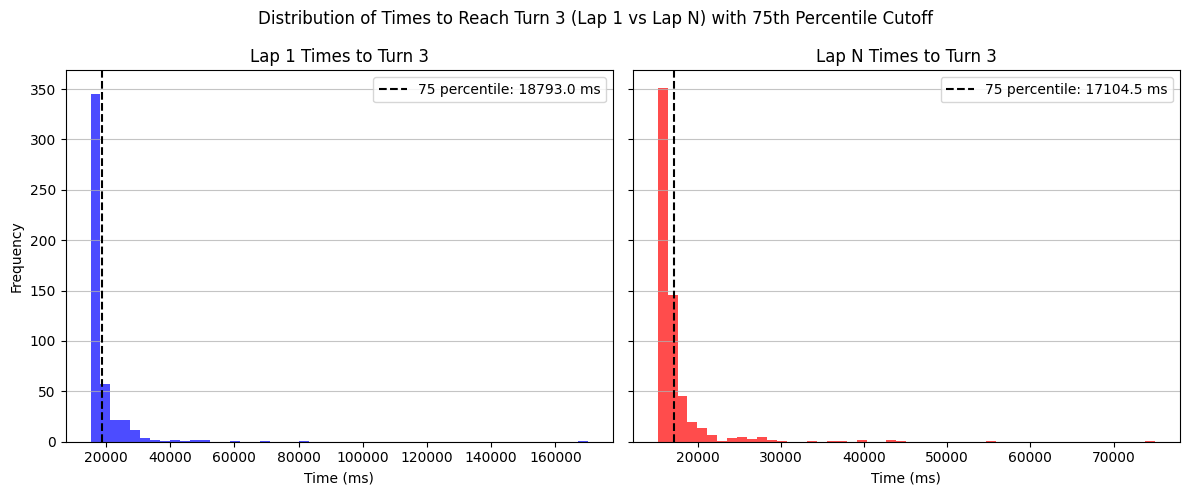

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(lap1_times, bins=50, color='blue', alpha=0.7)
axes[0].set_title("Lap 1 Times to Turn 3")
axes[0].set_xlabel("Time (ms)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', alpha=0.75)
axes[0].axvline(lap1_cutoff, color='black', linestyle='--', label=f'{percent} percentile: {lap1_cutoff} ms')
axes[0].legend()

axes[1].hist(lapn_times[lapn_times != 0], bins=50, color='red', alpha=0.7) # Remove the 0 times PLS CHECK WHY
axes[1].set_title("Lap N Times to Turn 3")
axes[1].set_xlabel("Time (ms)")
axes[1].grid(axis='y', alpha=0.75)
axes[1].axvline(lapn_cutoff, color='black', linestyle='--', label=f'{percent} percentile: {lapn_cutoff} ms')
axes[1].legend()

plt.suptitle(f"Distribution of Times to Reach Turn 3 (Lap 1 vs Lap N) with {percent}th Percentile Cutoff")
plt.tight_layout()
plt.show()

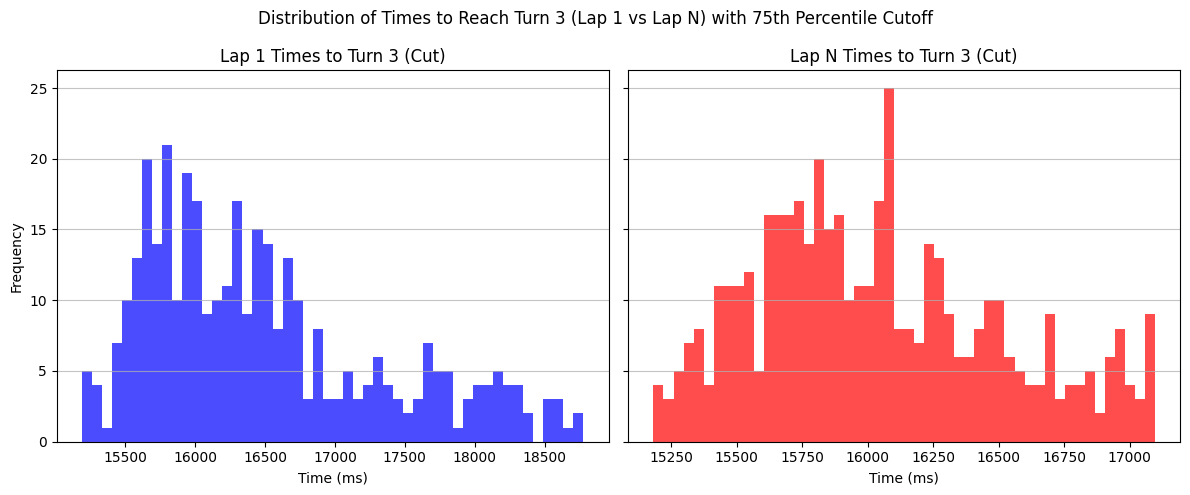

In [63]:
lap1_cut = lap1_times[lap1_times <= lap1_cutoff]
lapn_cut = lapn_times[lapn_times <= lapn_cutoff]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].hist(lap1_cut, bins=50, color='blue', alpha=0.7)
axes[0].set_title("Lap 1 Times to Turn 3 (Cut)")
axes[0].set_xlabel("Time (ms)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', alpha=0.75)

# Lap N Times Histogram after cut
axes[1].hist(lapn_cut[lapn_cut != 0], bins=50, color='red', alpha=0.7)
axes[1].set_title("Lap N Times to Turn 3 (Cut)")
axes[1].set_xlabel("Time (ms)")
axes[1].grid(axis='y', alpha=0.75)

plt.suptitle(f"Distribution of Times to Reach Turn 3 (Lap 1 vs Lap N) with {percent}th Percentile Cutoff")
plt.tight_layout()
plt.show()


## Quesitons to ask (we should justify all for the report):
1. what percentile should we be using
2. should we be using std over percentile
3. should the percentile be n% of the combined or seperate
4. where to call the point to time do (currently 1100m)
5. if this is good / not good - I wont take any offence so dw, just looking for a good mark lol

# Turn to distance plot 

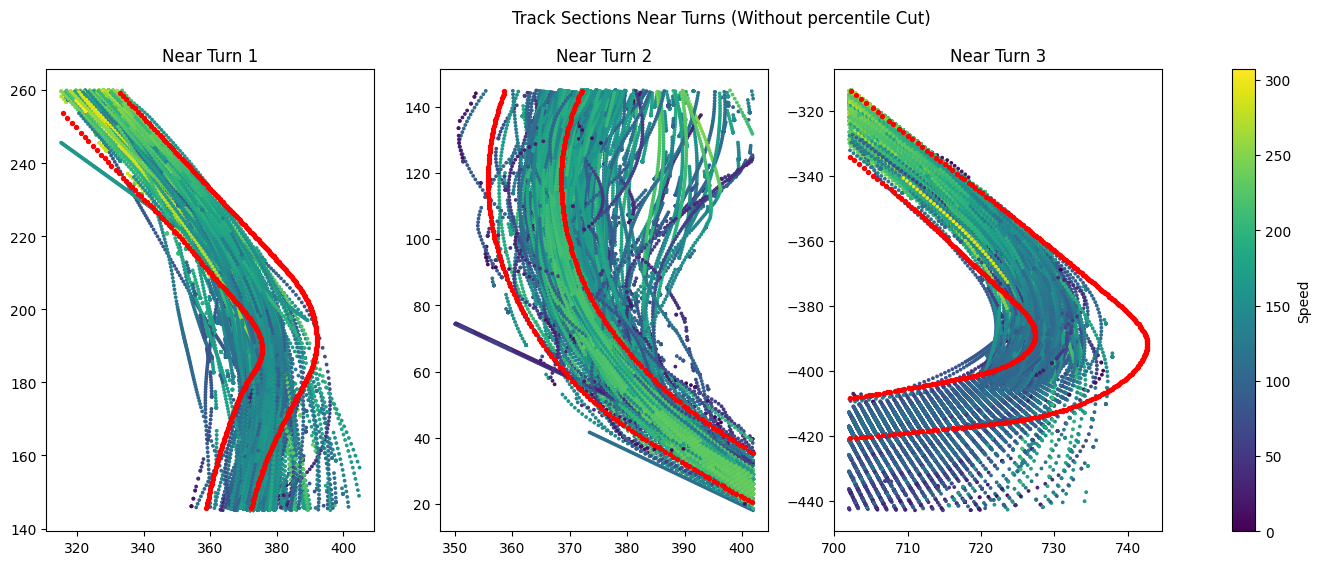

In [64]:
t = 3
fig, axs = plt.subplots(1, t, figsize=(18, 6))

for i in range(t):
    turn_n = turns.iloc[i]

    x_min = min(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    x_max = max(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    y_min = min(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])
    y_max = max(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])

    near_turn_n = run_data[(run_data[x_col] >= x_min) & (run_data[x_col] <= x_max) & 
                           (run_data[y_col] >= y_min) & (run_data[y_col] <= y_max)]

    tl_t2 = track_left[(track_left["WORLDPOSX"] >= x_min) & (track_left["WORLDPOSX"] <= x_max) & 
                       (track_left["WORLDPOSY"] >= y_min) & (track_left["WORLDPOSY"] <= y_max)]
    tr_t2 = track_right[(track_right["WORLDPOSX"] >= x_min) & (track_right["WORLDPOSX"] <= x_max) & 
                        (track_right["WORLDPOSY"] >= y_min) & (track_right["WORLDPOSY"] <= y_max)]

    scatter = axs[i].scatter(near_turn_n[x_col], near_turn_n[y_col], 
                             c=near_turn_n["M_SPEED_1"], cmap="viridis", s=3)

    # cbar = plt.colorbar(scatter, ax=axs[i])
    # cbar.set_label("Speed") 

    axs[i].scatter(tl_t2["WORLDPOSX"], tl_t2["WORLDPOSY"], s=8, color="red")
    axs[i].scatter(tr_t2["WORLDPOSX"], tr_t2["WORLDPOSY"], s=8, color="red")
    axs[i].set_title(f"Near Turn {i + 1}")

fig.colorbar(scatter, ax=axs, orientation='vertical', label="Speed") 
plt.suptitle("Track Sections Near Turns (Without percentile Cut)")
plt.show()


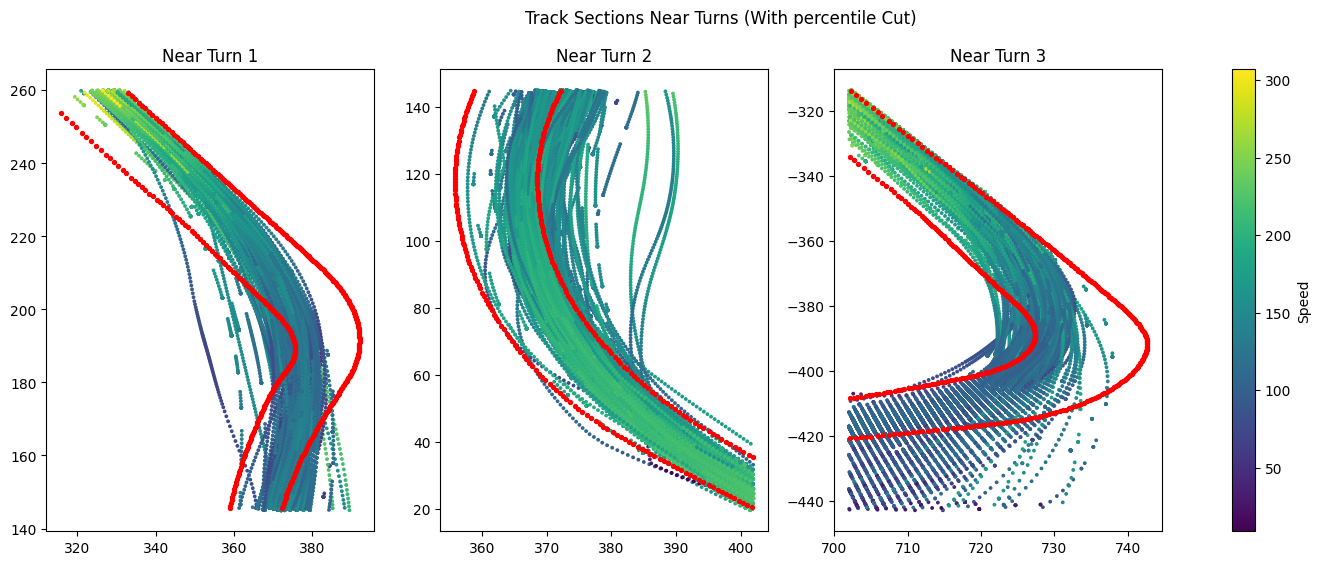

In [65]:
t = 3
fig, axs = plt.subplots(1, t, figsize=(18, 6))
run_data_cut = pd.concat([lap_1_cut, lap_n_cut])

for i in range(t):
    turn_n = turns.iloc[i]

    x_min = min(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    x_max = max(turn_n["CORNER_X1"], turn_n["CORNER_X2"])
    y_min = min(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])
    y_max = max(turn_n["CORNER_Y1"], turn_n["CORNER_Y2"])

    near_turn_n = run_data_cut[(run_data_cut[x_col] >= x_min) & (run_data_cut[x_col] <= x_max) & 
                           (run_data_cut[y_col] >= y_min) & (run_data_cut[y_col] <= y_max)]

    tl_t2 = track_left[(track_left["WORLDPOSX"] >= x_min) & (track_left["WORLDPOSX"] <= x_max) & 
                       (track_left["WORLDPOSY"] >= y_min) & (track_left["WORLDPOSY"] <= y_max)]
    tr_t2 = track_right[(track_right["WORLDPOSX"] >= x_min) & (track_right["WORLDPOSX"] <= x_max) & 
                        (track_right["WORLDPOSY"] >= y_min) & (track_right["WORLDPOSY"] <= y_max)]

    scatter = axs[i].scatter(near_turn_n[x_col], near_turn_n[y_col], 
                             c=near_turn_n["M_SPEED_1"], cmap="viridis", s=3)

    # cbar = plt.colorbar(scatter, ax=axs[i])
    # cbar.set_label("Speed") 

    axs[i].scatter(tl_t2["WORLDPOSX"], tl_t2["WORLDPOSY"], s=8, color="red")
    axs[i].scatter(tr_t2["WORLDPOSX"], tr_t2["WORLDPOSY"], s=8, color="red")
    axs[i].set_title(f"Near Turn {i + 1}")

fig.colorbar(scatter, ax=axs, orientation='vertical', label="Speed") 
plt.suptitle("Track Sections Near Turns (With percentile Cut)")
plt.show()

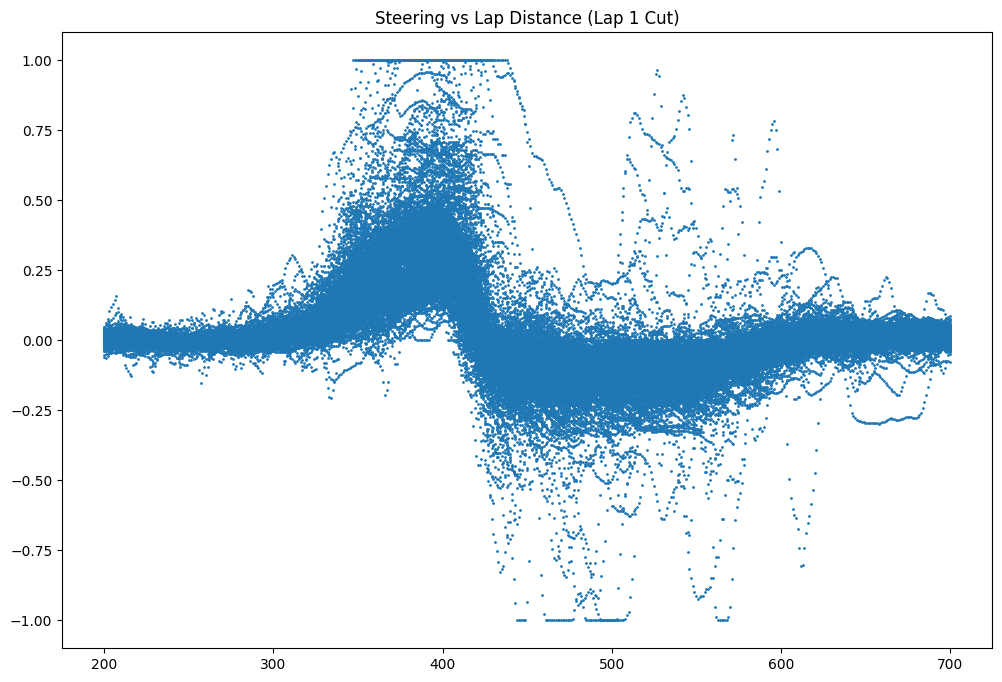

In [66]:
plt.figure(figsize=(12, 8))
a = lap_1_cut[(lap_1_cut["M_LAPDISTANCE_1"] >= 200) & (lap_1_cut["M_LAPDISTANCE_1"] <= 700)]
plt.scatter(x = a["M_LAPDISTANCE_1"], y = a["M_STEER_1"], s = 1)
plt.title("Steering vs Lap Distance (Lap 1 Cut)")
plt.show()

In [67]:
print(
    f"Total 1st laps: {len(lap_1_cut[['M_SESSIONUID', 'M_CURRENTLAPNUM']].drop_duplicates())}",
    f"Total n>1 laps: {len(lap_n_cut[['M_SESSIONUID', 'M_CURRENTLAPNUM']].drop_duplicates())}",
    sep="\n"
)


Total 1st laps: 357
Total n>1 laps: 460
